## Imports

In [3]:
import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import time
from datetime import datetime
from google.colab import files
import matplotlib.pyplot as plt


In [87]:
def plotting_predictions(df_pre):
  # Convert timestamp to datetime (if not already done)
  df_pre['timestamp'] = pd.to_datetime(df_pre['timestamp'])

  # Create a line plot
  plt.figure(figsize=(12, 6))
  plt.plot(df_pre['timestamp'], df_pre['pre_price'], label='Predicted Price (pre_price)', color='blue', marker='o', markersize=4)
  plt.plot(df_pre['timestamp'], df_pre['real_price'], label='Real Price (real_price)', color='red', marker='o', markersize=4)

  # Add labels and title
  plt.xlabel('Timestamp')
  plt.ylabel('Price')
  plt.title('Predicted vs Real Price Over Time')
  plt.legend()
  plt.grid(True)

  # Rotate x-axis labels for better readability
  plt.xticks(rotation=45)

  # Show the plot
  plt.tight_layout()
  plt.show()

# Load Model

In [4]:
model_2 = tf.keras.models.load_model("model_5.h5")
scaler = MinMaxScaler()
look_back = 50

In [48]:
predicted_data = {
  "timestamp" : [],
  "pre_price" : [],
}
a = False
b = True

In [49]:
while b:
  if datetime.now().minute == 25 and a == False:
        print("a == True")
        a = True
        break;
while a:
    # 5 dakikalık veriyi çekme
    df = yf.download(tickers="BTC-USD", period="1d", interval="5m")
    df.columns = ['Open', 'High', 'Low', 'Close', 'Volume']
    desired_order = ["Open", "Close",	"High",	"Low", "Volume"]
    df = df[desired_order]
    df.index.rename("Timestamp", inplace=True)

    # Preprocess and normalize
    df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)

    # Get last 50 time steps as input
    test_input = df_scaled.iloc[-look_back:].values.reshape(1, look_back, df.shape[1])

    # Predict next close price
    predicted_scaled = model_2.predict(test_input)
    predicted_close = scaler.inverse_transform(
        [[0, predicted_scaled[0][0], 0, 0, 0]]
    )[0][1]
    # Get the last timestamp from the data and convert to datetime if necessary
    last_timestamp = df.index[-1]


    # Add 5 steps ahead to the timestamp (based on your data frequency, e.g., 'T' for minutes)
    predicted_timestamp = last_timestamp + pd.Timedelta(minutes=5)
    # Create a message with the prediction details
    son_btc_deger = df["Close"].iloc[-1]
    message = f"Predicted Time: {predicted_timestamp}\nPredicted Price: ${predicted_close:.2f}"

    message2 = f"Son Zaman ={last_timestamp}\nSon BTC Değeri={son_btc_deger}"

    # Print the result locally for verification
    print(message2)
    print(message)
    predicted_data["timestamp"].append(predicted_timestamp.strftime("%Y-%m-%d %H:%M:%S"))
    predicted_data["pre_price"].append(predicted_close)
    print(datetime.now())


    # Wait before making another prediction (adjust for your needs)
    time.sleep(300)  # Predict every 1 minute


a == True


[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Son Zaman =2025-02-07 13:20:00+00:00
Son BTC Değeri=97724.1171875
Predicted Time: 2025-02-07 13:25:00+00:00
Predicted Price: $97710.88
2025-02-07 13:25:00.473108


[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Son Zaman =2025-02-07 13:25:00+00:00
Son BTC Değeri=97644.3359375
Predicted Time: 2025-02-07 13:30:00+00:00
Predicted Price: $97690.51
2025-02-07 13:30:00.832057


[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Son Zaman =2025-02-07 13:30:00+00:00
Son BTC Değeri=97722.71875
Predicted Time: 2025-02-07 13:35:00+00:00
Predicted Price: $97659.05
2025-02-07 13:35:01.264234


[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Son Zaman =2025-02-07 13:35:00+00:00
Son BTC Değeri=97792.7578125
Predicted Time: 2025-02-07 13:40:00+00:00
Predicted Price: $97819.30
2025-02-07 13:40:01.650521


[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Son Zaman =2025-02-07 13:40:00+00:00
Son BTC Değeri=98453.609375
Predicted Time: 2025-02-07 13:45:00+00:00
Predicted Price: $98565.70
2025-02-07 13:45:02.009427


[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Son Zaman =2025-02-07 13:45:00+00:00
Son BTC Değeri=98351.5234375
Predicted Time: 2025-02-07 13:50:00+00:00
Predicted Price: $98321.95
2025-02-07 13:50:02.482708


[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Son Zaman =2025-02-07 13:50:00+00:00
Son BTC Değeri=98553.8984375
Predicted Time: 2025-02-07 13:55:00+00:00
Predicted Price: $98520.84
2025-02-07 13:55:02.897961


[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Son Zaman =2025-02-07 13:55:00+00:00
Son BTC Değeri=98700.203125
Predicted Time: 2025-02-07 14:00:00+00:00
Predicted Price: $98611.82
2025-02-07 14:00:03.337554


[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Son Zaman =2025-02-07 14:00:00+00:00
Son BTC Değeri=98951.0
Predicted Time: 2025-02-07 14:05:00+00:00
Predicted Price: $98862.80
2025-02-07 14:05:03.736548


[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Son Zaman =2025-02-07 14:05:00+00:00
Son BTC Değeri=98872.5078125
Predicted Time: 2025-02-07 14:10:00+00:00
Predicted Price: $98710.60
2025-02-07 14:10:04.095171


[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Son Zaman =2025-02-07 14:10:00+00:00
Son BTC Değeri=99459.796875
Predicted Time: 2025-02-07 14:15:00+00:00
Predicted Price: $99430.74
2025-02-07 14:15:04.499560


[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Son Zaman =2025-02-07 14:15:00+00:00
Son BTC Değeri=99634.2109375
Predicted Time: 2025-02-07 14:20:00+00:00
Predicted Price: $99562.97
2025-02-07 14:20:04.882493


[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Son Zaman =2025-02-07 14:20:00+00:00
Son BTC Değeri=99796.5859375
Predicted Time: 2025-02-07 14:25:00+00:00
Predicted Price: $99721.14
2025-02-07 14:25:05.306386


[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Son Zaman =2025-02-07 14:25:00+00:00
Son BTC Değeri=99657.6953125
Predicted Time: 2025-02-07 14:30:00+00:00
Predicted Price: $99534.76
2025-02-07 14:30:05.701009


[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Son Zaman =2025-02-07 14:30:00+00:00
Son BTC Değeri=99690.65625
Predicted Time: 2025-02-07 14:35:00+00:00
Predicted Price: $99460.36
2025-02-07 14:35:06.116955


[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Son Zaman =2025-02-07 14:35:00+00:00
Son BTC Değeri=99484.9453125
Predicted Time: 2025-02-07 14:40:00+00:00
Predicted Price: $99109.73
2025-02-07 14:40:06.598453


[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Son Zaman =2025-02-07 14:40:00+00:00
Son BTC Değeri=99665.3359375
Predicted Time: 2025-02-07 14:45:00+00:00
Predicted Price: $99610.46
2025-02-07 14:45:07.134111


[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Son Zaman =2025-02-07 14:45:00+00:00
Son BTC Değeri=99887.484375
Predicted Time: 2025-02-07 14:50:00+00:00
Predicted Price: $99586.03
2025-02-07 14:50:07.552977


[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Son Zaman =2025-02-07 14:50:00+00:00
Son BTC Değeri=100153.921875
Predicted Time: 2025-02-07 14:55:00+00:00
Predicted Price: $100062.57
2025-02-07 14:55:08.046829


[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Son Zaman =2025-02-07 14:55:00+00:00
Son BTC Değeri=99952.9453125
Predicted Time: 2025-02-07 15:00:00+00:00
Predicted Price: $99705.10
2025-02-07 15:00:08.468165


[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Son Zaman =2025-02-07 15:00:00+00:00
Son BTC Değeri=99535.7578125
Predicted Time: 2025-02-07 15:05:00+00:00
Predicted Price: $99191.14
2025-02-07 15:05:08.935523


[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Son Zaman =2025-02-07 15:05:00+00:00
Son BTC Değeri=98656.7265625
Predicted Time: 2025-02-07 15:10:00+00:00
Predicted Price: $98841.18
2025-02-07 15:10:09.403044


[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Son Zaman =2025-02-07 15:10:00+00:00
Son BTC Değeri=99114.21875
Predicted Time: 2025-02-07 15:15:00+00:00
Predicted Price: $98940.51
2025-02-07 15:15:09.954003


[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Son Zaman =2025-02-07 15:15:00+00:00
Son BTC Değeri=98437.859375
Predicted Time: 2025-02-07 15:20:00+00:00
Predicted Price: $98157.78
2025-02-07 15:20:10.348118


[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Son Zaman =2025-02-07 15:20:00+00:00
Son BTC Değeri=97741.375
Predicted Time: 2025-02-07 15:25:00+00:00
Predicted Price: $97821.12
2025-02-07 15:25:10.731584


[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Son Zaman =2025-02-07 15:25:00+00:00
Son BTC Değeri=98278.6328125
Predicted Time: 2025-02-07 15:30:00+00:00
Predicted Price: $98303.03
2025-02-07 15:30:11.123075


[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Son Zaman =2025-02-07 15:30:00+00:00
Son BTC Değeri=98535.875
Predicted Time: 2025-02-07 15:35:00+00:00
Predicted Price: $98772.97
2025-02-07 15:35:11.541132


[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Son Zaman =2025-02-07 15:35:00+00:00
Son BTC Değeri=98430.015625
Predicted Time: 2025-02-07 15:40:00+00:00
Predicted Price: $98378.22
2025-02-07 15:40:12.067654


[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Son Zaman =2025-02-07 15:40:00+00:00
Son BTC Değeri=98649.0546875
Predicted Time: 2025-02-07 15:45:00+00:00
Predicted Price: $98873.49
2025-02-07 15:45:12.467347


[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Son Zaman =2025-02-07 15:45:00+00:00
Son BTC Değeri=98629.375
Predicted Time: 2025-02-07 15:50:00+00:00
Predicted Price: $98700.86
2025-02-07 15:50:12.905242


[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Son Zaman =2025-02-07 15:50:00+00:00
Son BTC Değeri=98836.1953125
Predicted Time: 2025-02-07 15:55:00+00:00
Predicted Price: $98672.35
2025-02-07 15:55:13.438110


[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Son Zaman =2025-02-07 15:55:00+00:00
Son BTC Değeri=98165.4453125
Predicted Time: 2025-02-07 16:00:00+00:00
Predicted Price: $98167.03
2025-02-07 16:00:13.803165


[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Son Zaman =2025-02-07 16:00:00+00:00
Son BTC Değeri=98303.5234375
Predicted Time: 2025-02-07 16:05:00+00:00
Predicted Price: $97872.69
2025-02-07 16:05:14.228782


[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Son Zaman =2025-02-07 16:05:00+00:00
Son BTC Değeri=97982.8515625
Predicted Time: 2025-02-07 16:10:00+00:00
Predicted Price: $97769.01
2025-02-07 16:10:14.622792


[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Son Zaman =2025-02-07 16:10:00+00:00
Son BTC Değeri=98169.8046875
Predicted Time: 2025-02-07 16:15:00+00:00
Predicted Price: $98160.53
2025-02-07 16:15:15.099345


[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Son Zaman =2025-02-07 16:15:00+00:00
Son BTC Değeri=97977.8359375
Predicted Time: 2025-02-07 16:20:00+00:00
Predicted Price: $98155.61
2025-02-07 16:20:15.622358


[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Son Zaman =2025-02-07 16:20:00+00:00
Son BTC Değeri=98388.1484375
Predicted Time: 2025-02-07 16:25:00+00:00
Predicted Price: $98367.56
2025-02-07 16:25:16.055420


[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Son Zaman =2025-02-07 16:25:00+00:00
Son BTC Değeri=98189.8828125
Predicted Time: 2025-02-07 16:30:00+00:00
Predicted Price: $98090.73
2025-02-07 16:30:16.443137


[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Son Zaman =2025-02-07 16:30:00+00:00
Son BTC Değeri=98100.8359375
Predicted Time: 2025-02-07 16:35:00+00:00
Predicted Price: $98054.40
2025-02-07 16:35:16.795994


[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Son Zaman =2025-02-07 16:35:00+00:00
Son BTC Değeri=98070.96875
Predicted Time: 2025-02-07 16:40:00+00:00
Predicted Price: $98136.02
2025-02-07 16:40:17.219212


[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Son Zaman =2025-02-07 16:40:00+00:00
Son BTC Değeri=98203.109375
Predicted Time: 2025-02-07 16:45:00+00:00
Predicted Price: $98169.79
2025-02-07 16:45:17.621050


[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Son Zaman =2025-02-07 16:45:00+00:00
Son BTC Değeri=98007.75
Predicted Time: 2025-02-07 16:50:00+00:00
Predicted Price: $97863.68
2025-02-07 16:50:17.979480


[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Son Zaman =2025-02-07 16:50:00+00:00
Son BTC Değeri=97880.140625
Predicted Time: 2025-02-07 16:55:00+00:00
Predicted Price: $97842.03
2025-02-07 16:55:18.437000


[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Son Zaman =2025-02-07 16:55:00+00:00
Son BTC Değeri=97785.109375
Predicted Time: 2025-02-07 17:00:00+00:00
Predicted Price: $97902.55
2025-02-07 17:00:18.841157


[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Son Zaman =2025-02-07 17:00:00+00:00
Son BTC Değeri=97861.890625
Predicted Time: 2025-02-07 17:05:00+00:00
Predicted Price: $97914.41
2025-02-07 17:05:19.221281


[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Son Zaman =2025-02-07 17:05:00+00:00
Son BTC Değeri=97781.90625
Predicted Time: 2025-02-07 17:10:00+00:00
Predicted Price: $97802.38
2025-02-07 17:10:19.680158


[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Son Zaman =2025-02-07 17:10:00+00:00
Son BTC Değeri=98037.6796875
Predicted Time: 2025-02-07 17:15:00+00:00
Predicted Price: $97851.03
2025-02-07 17:15:20.036677


[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Son Zaman =2025-02-07 17:15:00+00:00
Son BTC Değeri=98018.7265625
Predicted Time: 2025-02-07 17:20:00+00:00
Predicted Price: $97848.48
2025-02-07 17:20:20.469381


[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Son Zaman =2025-02-07 17:20:00+00:00
Son BTC Değeri=97395.5703125
Predicted Time: 2025-02-07 17:25:00+00:00
Predicted Price: $97419.98
2025-02-07 17:25:20.951112


[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Son Zaman =2025-02-07 17:25:00+00:00
Son BTC Değeri=97339.6953125
Predicted Time: 2025-02-07 17:30:00+00:00
Predicted Price: $97291.75
2025-02-07 17:30:21.340108


[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Son Zaman =2025-02-07 17:30:00+00:00
Son BTC Değeri=97477.640625
Predicted Time: 2025-02-07 17:35:00+00:00
Predicted Price: $97378.94
2025-02-07 17:35:21.693762


[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Son Zaman =2025-02-07 17:35:00+00:00
Son BTC Değeri=97460.8359375
Predicted Time: 2025-02-07 17:40:00+00:00
Predicted Price: $97513.97
2025-02-07 17:40:22.153815


[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Son Zaman =2025-02-07 17:40:00+00:00
Son BTC Değeri=97595.1953125
Predicted Time: 2025-02-07 17:45:00+00:00
Predicted Price: $97602.75
2025-02-07 17:45:22.512077


[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Son Zaman =2025-02-07 17:45:00+00:00
Son BTC Değeri=97681.6015625
Predicted Time: 2025-02-07 17:50:00+00:00
Predicted Price: $97692.63
2025-02-07 17:50:22.944709


[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Son Zaman =2025-02-07 17:50:00+00:00
Son BTC Değeri=97641.1015625
Predicted Time: 2025-02-07 17:55:00+00:00
Predicted Price: $97481.69
2025-02-07 17:55:23.340465


KeyboardInterrupt: 

In [50]:
df_pre = pd.DataFrame(columns=["timestamp", "pre_price"])
df_pre = pd.DataFrame(predicted_data)
#df_pre["real_price"] = df['Close'].iloc[50:450].reset_index(drop=True)
df_pre.to_csv("5_tahmin.csv", index=False)
pd.read_csv("5_tahmin.csv")
files.download("5_tahmin.csv")

In [52]:
data = pd.read_csv("5_tahmin.csv")

In [62]:
df = yf.download(tickers="BTC-USD", period="1d", interval="5m")
df.columns = ['Open', 'High', 'Low', 'Close', 'Volume']
desired_order = ["Open", "Close",	"High",	"Low", "Volume"]
df = df[desired_order]
df.index.rename("Timestamp", inplace=True)

[*********************100%***********************]  1 of 1 completed


In [83]:
df_pre["real_price"] = df['Close'].iloc[161:216].reset_index(drop=True)

<ipython-input-87-85edcedf9fea>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre['timestamp'] = pd.to_datetime(df_pre['timestamp'])


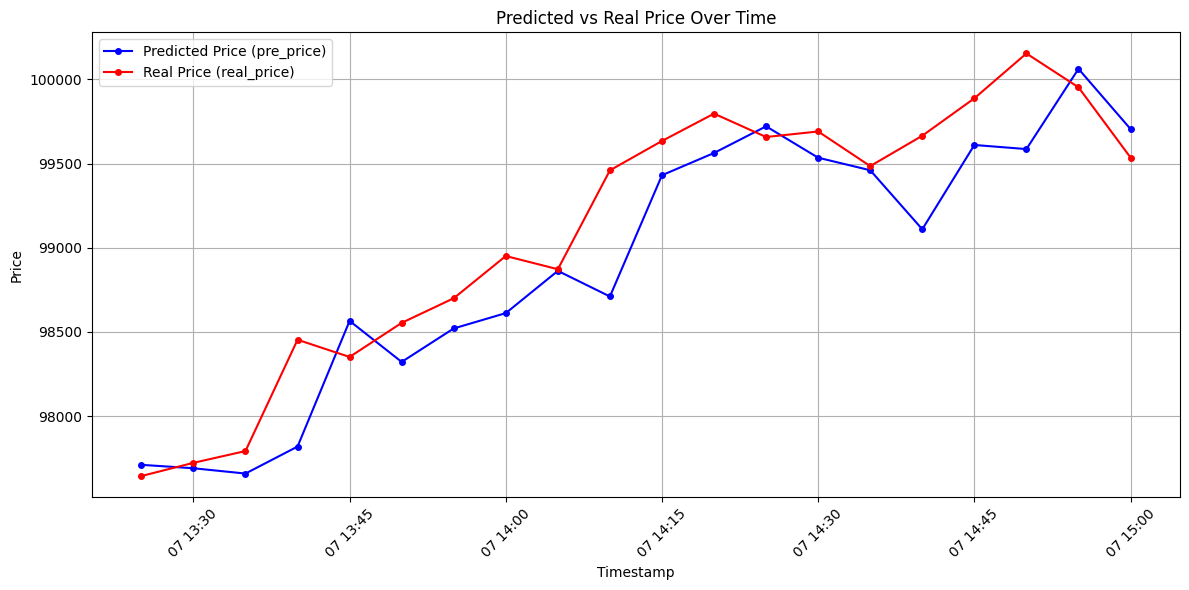

In [89]:
plotting_predictions(df_pre[:20])